In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# Load the dataset
df = pd.read_csv('/content/medicine_merged_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 138 entries, itching to workout_details
dtypes: int64(132), object(6)
memory usage: 5.2+ MB


In [6]:
# Get the shape of the dataset
print(df.shape)

(4920, 138)


In [8]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease,Description,Diet,Medication,Precautions,workout_details
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,Fungal infection,Fungal infection is a common skin condition ca...,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C...","['Antifungal Cream', 'Fluconazole', 'Terbinafi...","bath twice, use detol or neem in bathing water...","Avoid sugary foods, Consume probiotics, Increa..."
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,Fungal infection,Fungal infection is a common skin condition ca...,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C...","['Antifungal Cream', 'Fluconazole', 'Terbinafi...","bath twice, use detol or neem in bathing water...","Avoid sugary foods, Consume probiotics, Increa..."
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,Fungal infection,Fungal infection is a common skin condition ca...,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C...","['Antifungal Cream', 'Fluconazole', 'Terbinafi...","bath twice, use detol or neem in bathing water...","Avoid sugary foods, Consume probiotics, Increa..."
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,Fungal infection,Fungal infection is a common skin condition ca...,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C...","['Antifungal Cream', 'Fluconazole', 'Terbinafi...","bath twice, use detol or neem in bathing water...","Avoid sugary foods, Consume probiotics, Increa..."
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,Fungal infection,Fungal infection is a common skin condition ca...,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C...","['Antifungal Cream', 'Fluconazole', 'Terbinafi...","bath twice, use detol or neem in bathing water...","Avoid sugary foods, Consume probiotics, Increa..."


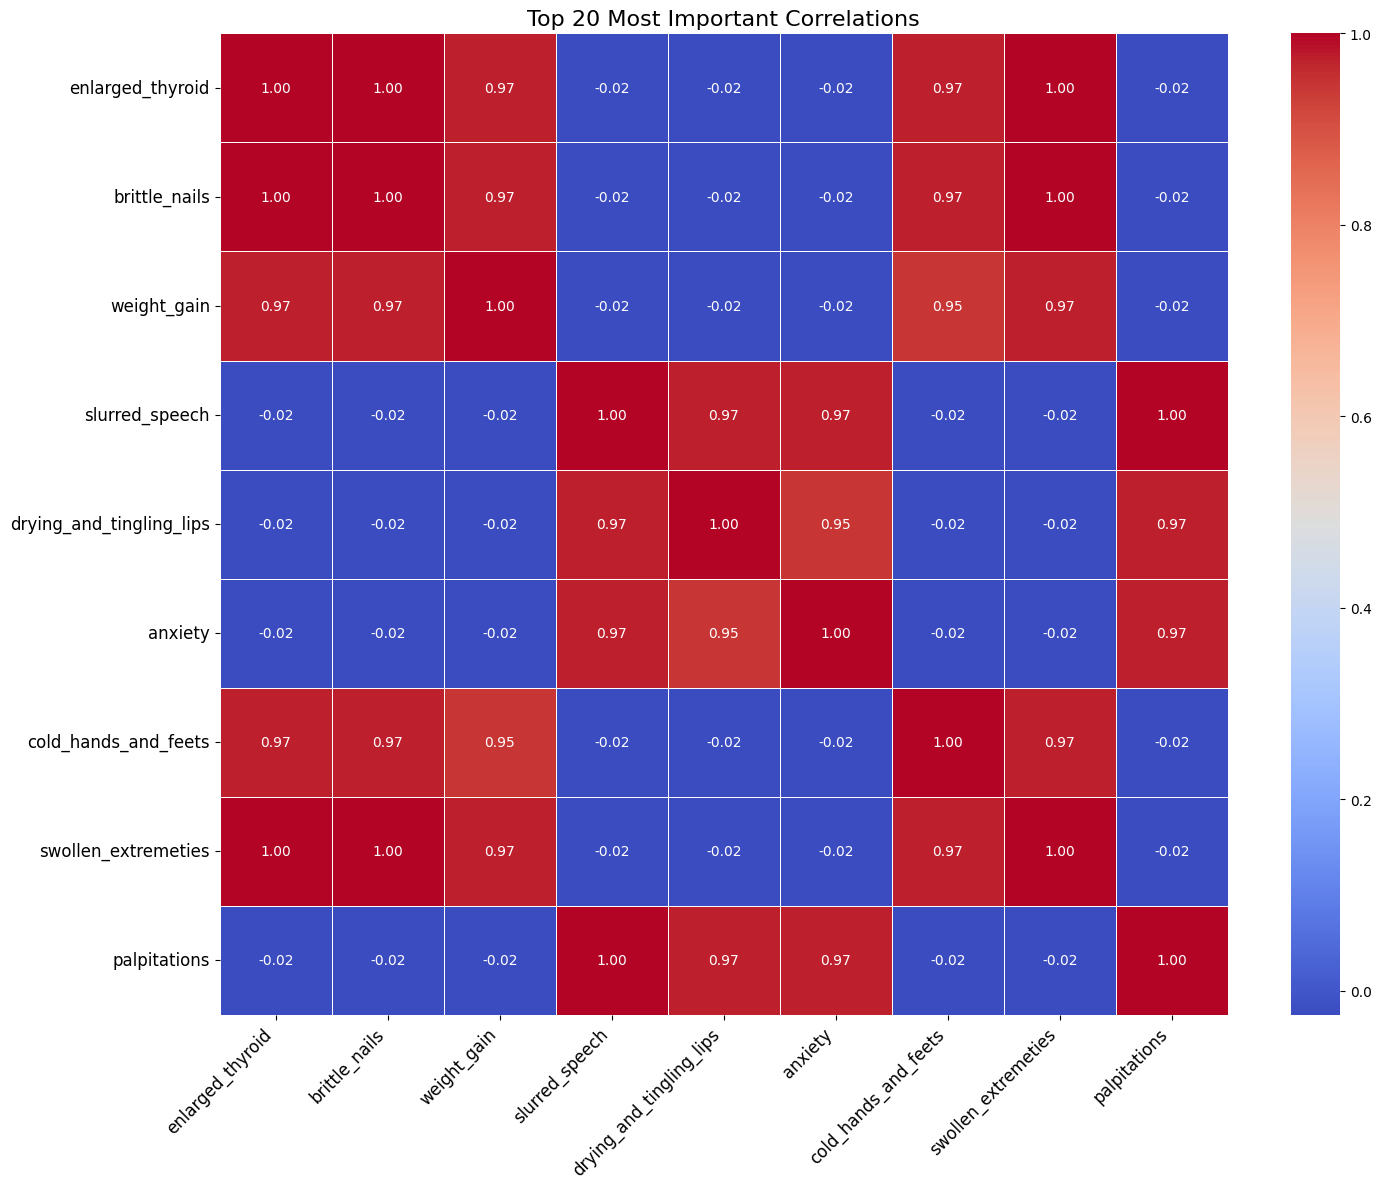

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numeric columns only
corr_matrix = df.select_dtypes(include=np.number).corr()

# Get the absolute values of correlations
corr_matrix_abs = corr_matrix.abs()

# Stack the correlation matrix and sort by absolute values
sorted_correlations = corr_matrix_abs.unstack().sort_values(ascending=False)

# Get the top 20 most important correlations (excluding self-correlations)
top_20_correlations = sorted_correlations[sorted_correlations < 1].head(20)

# Get the column names for the top 20 correlations
top_20_columns = set(top_20_correlations.index.get_level_values(0)).union(set(top_20_correlations.index.get_level_values(1)))

# Filter the correlation matrix to include only the top 20 columns
top_20_corr_matrix = corr_matrix.loc[list(top_20_columns), list(top_20_columns)]

# Increase the size of the heatmap
plt.figure(figsize=(15, 12))  # Adjust figsize for a larger heatmap

# Visualize the correlation matrix using seaborn for better aesthetics
sns.heatmap(top_20_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Top 20 Most Important Correlations', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Disease' column
df['Encoded_Disease'] = le.fit_transform(df['Disease'])

# Print the first few rows of the updated dataframe
print(df.head())


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  blister  \
0       0           0             0        0                 0  ...        0   
1       0           0             0        0                 0  ...        0   
2       0           0             0        0                 0  ...        0   
3       0           0             0        0                 0  ...        0   
4       0           0             0        0                 0  ...        0   

   red_sore_around_nose  yellow_crust_ooze  

In [17]:
# Split the dataset into features (X) and target (y)
X = df.drop(['Encoded_Disease', 'Disease', 'Description', 'Diet', 'Medication', 'Precautions', 'workout_details'], axis=1)
# Dropping the specified columns

y = df['Encoded_Disease']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        45
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00 

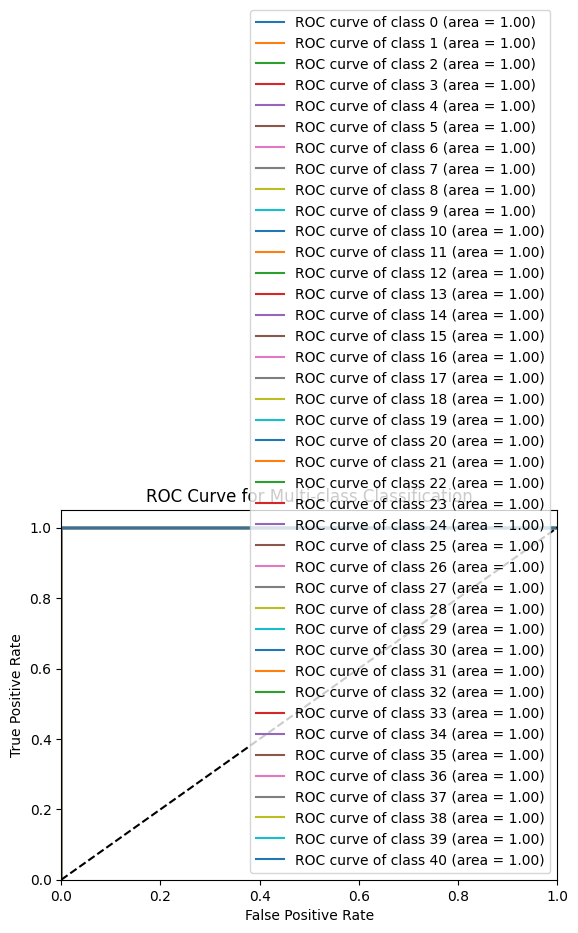

AUC Score (macro-average): 1.0


In [18]:
# Plot the ROC Curve for each class
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

y_pred_proba = rfc.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

# Plot ROC curves for all classes
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC Score (micro-average)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("AUC Score (macro-average):", auc_score)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 171 features, but RandomForestClassifier is expecting 132 features as input.

In [24]:
import numpy as np
import pandas as pd

# Your input data as a list
input_data_list = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Convert the list to a NumPy array
numpy_array = np.array([input_data_list])

# Get the feature names used during training
training_features = X_train.columns

# **Ensure input data has the correct number of features**
# If your input data has more features than your training data,
# you need to select only the relevant features or adjust your input data.
# For example, if you know which 132 features are relevant, you can select them:
numpy_array = numpy_array[:, :len(training_features)]  # Select the first 132 features

# Create a DataFrame with the correct features
input_data = pd.DataFrame(numpy_array, columns=training_features)

# Make the prediction
predicted_disease = rfc.predict(input_data.values)

# Print the predicted Encoded_Disease
print("Predicted Encoded_Disease:", predicted_disease[0])

Predicted Encoded_Disease: 15


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
import numpy as np
import pandas as pd

# Your input data as a list
# Your input data as a list
input_data_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Convert the list to a NumPy array
numpy_array = np.array([input_data_list])

# Get the feature names used during training
training_features = X_train.columns

# Ensure input data has the correct number of features
numpy_array = numpy_array[:, :len(training_features)]

# Create a DataFrame with the correct features
input_data = pd.DataFrame(numpy_array, columns=training_features)

# Make the prediction
predicted_encoded_disease = rfc.predict(input_data.values)[0]

# Decode the Encoded_Disease back to the original disease name
predicted_disease = le.inverse_transform([predicted_encoded_disease])[0]  # Use inverse_transform

# Print the predicted disease name
print("Predicted Disease:", predicted_disease)

Predicted Disease: Heart attack


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
import numpy as np
import pandas as pd

# Your input data as a list
input_data_list = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Convert the list to a NumPy array
numpy_array = np.array([input_data_list])

# Get the feature names used during training
training_features = X_train.columns

# Ensure input data has the correct number of features
numpy_array = numpy_array[:, :len(training_features)]

# Create a DataFrame with the correct features
input_data = pd.DataFrame(numpy_array, columns=training_features)

# Make the prediction
predicted_encoded_disease = rfc.predict(input_data.values)[0]

# Decode the Encoded_Disease back to the original disease name
predicted_disease = le.inverse_transform([predicted_encoded_disease])[0]

# Get recommendations from the original DataFrame
recommendations = df[df['Disease'] == predicted_disease][['Description', 'Diet', 'Medication', 'Precautions', 'workout_details']].iloc[0]

# Print the predicted disease and recommendations
print("Predicted Disease:", predicted_disease)
print("\nRecommendations:")
print("Description:", recommendations['Description'])
print("Diet:", recommendations['Diet'])
print("Medication:", recommendations['Medication'])
print("Precautions:", recommendations['Precautions'])
print("Workout Details:", recommendations['workout_details'])

Predicted Disease: Fungal infection

Recommendations:
Description: Fungal infection is a common skin condition caused by fungi.
Diet: ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
Medication: ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
Precautions: bath twice, use detol or neem in bathing water, keep infected area dry, use clean cloths
Workout Details: Avoid sugary foods, Consume probiotics, Increase intake of garlic, Include yogurt in diet, Limit processed foods, Stay hydrated, Consume green tea, Eat foods rich in zinc, Include turmeric in diet, Eat fruits and vegetables


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
